In [1]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import signal
import mne, glob
from mne import create_info
from mne.io import RawArray
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# path = r'C:\Users\damia\Documents\CPdsai EEG\ExtractedFeatures\ExtractedFeatures'
# list_mat = os.listdir(path)
# list_mat.remove('readme.txt')
# list_mat.remove('.ipynb_checkpoints')
# list_mat.remove('Untitled.ipynb')
# list_mat.remove('Testing1.ipynb')
# list_mat.remove('Testing2.ipynb')
# list_mat.remove('asm_LDS')
# list_mat.remove('asm_movingAve')
# list_mat.remove('dasm_LDS')
# list_mat.remove('dasm_movingAve')
# list_mat.remove('dcau_LDS')
# list_mat.remove('dcau_movingAve')
# list_mat.remove('de_LDS')
# list_mat.remove('de_movingAve')
# list_mat.remove('import_matlab2MNE.ipynb')
# list_mat.remove('psd_LDS')
# list_mat.remove('psd_movingAve')
# list_mat.remove('rasm_LDS')
# list_mat.remove('rasm_movingAve')

# list_mat

In [3]:
# labels = loadmat(path + '\\' + list_mat[-1])
# labels['label']

In [4]:
# loado = list_mat[0]
# print(loado)
# data_o = loadmat(path +'\\' + loado)
# print(data_o)

# # data = np.array(data_o)


In [5]:
# eegsigo = data_o['de_movingAve1']
# plt.plot(eegsigo[1, :])
# plt.show()

In [6]:
# eegsigo = data_o['psd_movingAve1']
# plt.plot(eegsigo[1, :])
# plt.show()

In [7]:
path = r'C:\Users\damia\Documents\CPdsai EEG\Preprocessed_EEG\Preprocessed_EEG'
list_mat = os.listdir(path)
list_mat.remove('readme.txt')
# list_mat.remove('.ipynb_checkpoints')
# list_mat.remove('Untitled.ipynb')

list_mat

['10_20131130.mat',
 '10_20131204.mat',
 '10_20131211.mat',
 '11_20140618.mat',
 '11_20140625.mat',
 '11_20140630.mat',
 '12_20131127.mat',
 '12_20131201.mat',
 '12_20131207.mat',
 '13_20140527.mat',
 '13_20140603.mat',
 '13_20140610.mat',
 '14_20140601.mat',
 '14_20140615.mat',
 '14_20140627.mat',
 '15_20130709.mat',
 '15_20131016.mat',
 '15_20131105.mat',
 '1_20131027.mat',
 '1_20131030.mat',
 '1_20131107.mat',
 '2_20140404.mat',
 '2_20140413.mat',
 '2_20140419.mat',
 '3_20140603.mat',
 '3_20140611.mat',
 '3_20140629.mat',
 '4_20140621.mat',
 '4_20140702.mat',
 '4_20140705.mat',
 '5_20140411.mat',
 '5_20140418.mat',
 '5_20140506.mat',
 '6_20130712.mat',
 '6_20131016.mat',
 '6_20131113.mat',
 '7_20131027.mat',
 '7_20131030.mat',
 '7_20131106.mat',
 '8_20140511.mat',
 '8_20140514.mat',
 '8_20140521.mat',
 '9_20140620.mat',
 '9_20140627.mat',
 '9_20140704.mat',
 'label.mat']

In [8]:
labels = loadmat(path + '\\' + list_mat[-1])
labels['label']

array([[ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1]],
      dtype=int16)

In [9]:
loado = list_mat[0]
print(loado)
data_o = loadmat(path +'\\' + loado)
print(data_o.keys())

# data = np.array(data_o)


10_20131130.mat
dict_keys(['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15'])


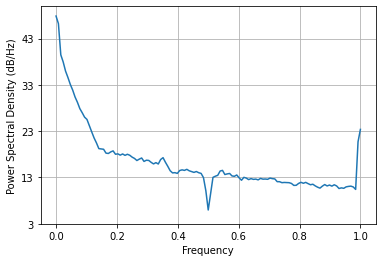

In [10]:
eegsig1 = data_o['ww_eeg1']
plt.psd(eegsig1[1, :])
plt.show()

[[-19.28210258  -9.29832458 -25.77900887 ...  -4.17232513 -16.89791679
  -10.19239426]
 [ 11.92092896  20.53380013  11.41428947 ... -15.94424248 -24.2292881
  -18.35823059]
 [  0.56624413  18.80526543 -11.08646393 ...   2.29477882 -10.46061516
  -19.1628933 ]
 ...
 [  3.4570694   10.72883606  -6.7949295  ...  -3.57627869  -1.87754631
    3.4570694 ]
 [  5.24520874  11.77191734  -3.66568565 ...  16.30187035  19.37150955
   15.07997513]
 [  9.08970833   6.34789467   1.16229057 ...  17.07673073  24.34849739
    8.5234642 ]]


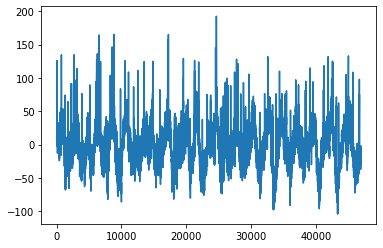

In [11]:
eegsig1 = data_o['ww_eeg1']
print(eegsig1)
plt.plot(eegsig1[1, :])
plt.show()

In [12]:
print(eegsig1)

[[-19.28210258  -9.29832458 -25.77900887 ...  -4.17232513 -16.89791679
  -10.19239426]
 [ 11.92092896  20.53380013  11.41428947 ... -15.94424248 -24.2292881
  -18.35823059]
 [  0.56624413  18.80526543 -11.08646393 ...   2.29477882 -10.46061516
  -19.1628933 ]
 ...
 [  3.4570694   10.72883606  -6.7949295  ...  -3.57627869  -1.87754631
    3.4570694 ]
 [  5.24520874  11.77191734  -3.66568565 ...  16.30187035  19.37150955
   15.07997513]
 [  9.08970833   6.34789467   1.16229057 ...  17.07673073  24.34849739
    8.5234642 ]]


In [13]:
columns = pd.read_excel('channel-order.xlsx',header=None)
df_list = columns.T.values.tolist()


In [14]:
df_eeg1 = pd.DataFrame(data_o['ww_eeg1'].T, columns=df_list)
df_eeg1

,FP1,FPZ,FP2,AF3,AF4,F7,F5,F3,F1,FZ,...,PO3,POZ,PO4,PO6,PO8,CB1,O1,OZ,O2,CB2
0,-19.282103,11.920929,0.566244,-31.620264,-18.179417,3.129244,-24.169683,-23.305416,-15.854836,-16.301870,...,1.132488,6.914139,-7.212162,7.599592,2.413988,10.311604,9.894371,3.457069,5.245209,9.089708
1,-9.298325,20.533800,18.805265,-31.411648,-1.043081,14.007092,-18.477440,-19.043684,-9.566545,-10.997057,...,6.228685,14.781952,2.861023,20.056963,17.523766,2.950430,8.463860,10.728836,11.771917,6.347895
2,-25.779009,11.414289,-11.086464,-37.610531,-7.927418,6.139278,-24.557114,-22.530556,-16.152859,-14.036894,...,3.427267,3.874302,-15.705824,-2.682209,-4.678965,2.890825,4.917383,-6.794930,-3.665686,1.162291
3,-0.685453,13.530254,-4.529953,-30.815601,-16.301870,9.626150,-21.576881,-18.298626,-12.338161,-12.964010,...,6.347895,8.314848,-5.632639,11.235476,9.506941,10.848045,9.447336,1.966953,10.997057,9.596348
4,-13.232231,12.338161,-3.606081,-37.342310,-32.335520,11.503696,-22.411346,-20.533800,-18.000603,-19.878149,...,1.132488,4.917383,-7.003546,15.050173,11.175871,7.003546,5.811453,0.923872,6.765127,11.205673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46996,-5.930662,-19.252300,-8.702278,26.792288,28.878450,-13.351440,-2.831221,22.828579,29.504299,38.653612,...,8.881092,8.434057,1.996756,-4.887581,-0.834465,15.020370,-1.221895,7.927418,24.378300,24.884939
46997,-23.841858,-20.772219,-28.342009,19.043684,20.563602,-18.358231,-10.639429,15.288591,23.514032,33.855438,...,-1.639128,2.145767,-1.549721,-8.970499,-8.434057,0.357628,-14.215708,8.195639,16.301870,21.666288
46998,-4.172325,-15.944242,2.294779,24.139881,24.706125,-18.358231,-6.079674,19.997358,29.504299,40.560961,...,-0.476837,4.023314,-0.298023,-17.136335,-11.980534,0.566244,-13.023615,-3.576279,16.301870,17.076731
46999,-16.897917,-24.229288,-10.460615,19.460917,15.467405,-25.242567,-9.089708,15.765429,24.467707,32.156706,...,-0.536442,4.500151,4.410744,2.563000,7.271767,-3.099442,-11.682510,-1.877546,19.371510,24.348497


In [15]:
# df_eeg1.columns.T
# mne.channels.find_layout(df_eeg1.info)

In [16]:
tuple_list = [('FP1',), ('FPZ',), ('FP2',), ('AF3',), ('AF4',), ('F7',), ('F5',), ('F3',), ('F1',), ('FZ',), ('F2',), ('F4',), ('F6',), ('F8',), ('FT7',), ('FC5',), ('FC3',), ('FC1',), ('FCZ',), ('FC2',), ('FC4',), ('FC6',), ('FT8',), ('T7',), ('C5',), ('C3',), ('C1',), ('CZ',), ('C2',), ('C4',), ('C6',), ('T8',), ('TP7',), ('CP5',), ('CP3',), ('CP1',), ('CPZ',), ('CP2',), ('CP4',), ('CP6',), ('TP8',), ('P7',), ('P5',), ('P3',), ('P1',), ('PZ',), ('P2',), ('P4',), ('P6',), ('P8',), ('PO7',), ('PO5',), ('PO3',), ('POZ',), ('PO4',), ('PO6',), ('PO8',), ('CB1',), ('O1',), ('OZ',), ('O2',), ('CB2',)]


In [17]:


# columns = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# data = np.zeros(eegsigo.shape)

# data = data[1,:,:]

# data = data.T


# sfreq = 125
# ch_names = list(columns)
# ch_types = ['eeg'] * (len(columns) - 1) + ['stim']
# ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
# info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)
# raw = mne.io.RawArray(data, info)
# raw.set_montage(ten_twenty_montage)


In [18]:
# raw = df_to_raw(data)

In [19]:
# os.chdir('/Users/damia/Documents/CPdsai EEG')
# columns = pd.read_excel('channel-order.xlsx',header=None)
# df_list = columns.T.values.tolist()

In [20]:
# df_eeg1 = pd.DataFrame(eegsig1['ww_eeg1'], columns=df_list)
# df_eeg1

In [21]:
import mne
from mne import create_info
from mne.io import RawArray

def convertTuple(tup):
    str_list = []
    for i in tuple_list:
        str = ''.join(i)
        str_list.append(str)
    return str_list



def df_to_raw(df_eeg1):
    sfreq = 125
    ch_names_tuples = list(df_eeg1.columns)
    ch_names = convertTuple(ch_names_tuples)
    ch_types = ['eeg'] * (len(df_eeg1.columns) - 1) + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('biosemi64')
#     ten_twenty_montage = mne.channels.make_standard_montage('standard_1005')
#     ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df_eeg1 = df_eeg1.T  #mne looks at the tranpose() format
    df_eeg1[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df_eeg1, info)
    raw.set_montage(ten_twenty_montage, on_missing = 'warn')

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

In [22]:
# sfreq = 125
# ch_names_tuples = list(df_eeg1.columns)
# ch_names = convertTuple(ch_names_tuples)
# ch_types = ['eeg'] * (len(df_eeg1.columns) - 1) + ['stim']
# ten_twenty_montage = mne.channels.make_standard_montage('standard_1005')

# df_eeg1 = df_eeg1.T 
# df_eeg1[:-1] *= 1e-6  

# info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

# raw = mne.io.RawArray(df_eeg1, info)
# raw.set_montage(ten_twenty_montage, on_missing = 'warn')

# raw.plot_psd()


# for i in (ch_names):
#     for j in (ch_names):
#         if i < j: 
#             if (raw[i] == raw[j]).any(): 
#                 print(raw.ch_names[i], raw.ch_names[j])


Creating RawArray with float64 data, n_channels=62, n_times=47001
    Range : 0 ... 47000 =      0.000 ...   376.000 secs
Ready.
Effective window size : 16.384 (s)


C:\Users\damia\AppData\Local\Temp/ipykernel_19972/2687489952.py:29: RuntimeWarning: DigMontage is only a subset of info. There are 13 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'PO5', 'POZ', 'PO6', 'CB1', 'OZ'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(ten_twenty_montage, on_missing = 'warn')


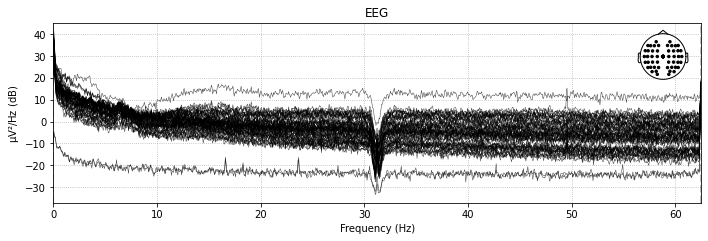

In [23]:
raw = df_to_raw(df_eeg1)

Using matplotlib as 2D backend.


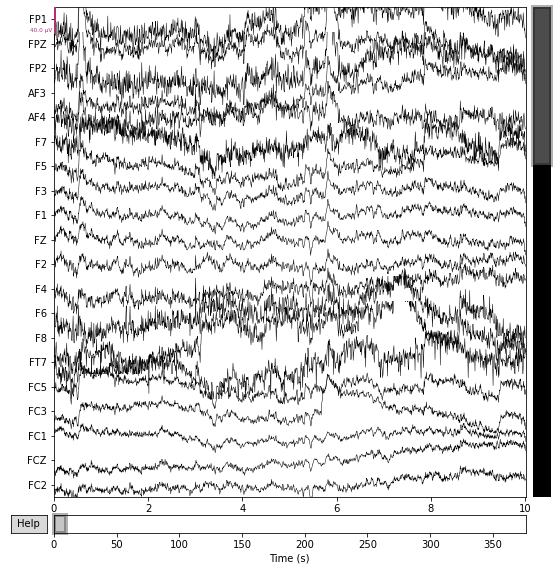

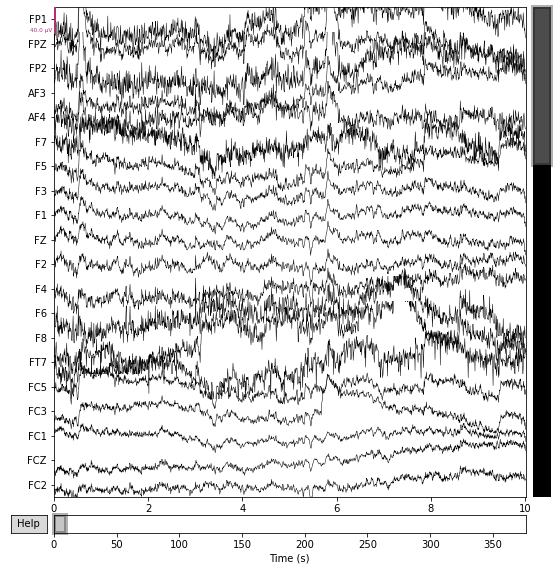

In [24]:
raw.plot()


In [25]:
# rawlayout = mne.channels.make_eeg_layout(raw.info)

In [26]:
raw.notch_filter(50, filter_length='auto', phase='zero') #250/2 based on Nyquist Theorem

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)



<RawArray | 62 x 47001 (376.0 s), ~22.3 MB, data loaded>

Effective window size : 16.384 (s)


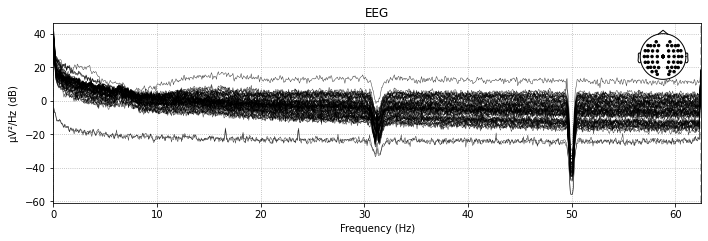

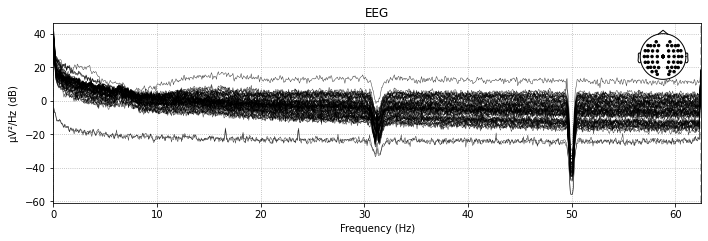

In [27]:
#observe that the 50Hz noise is now gone
raw.plot_psd()

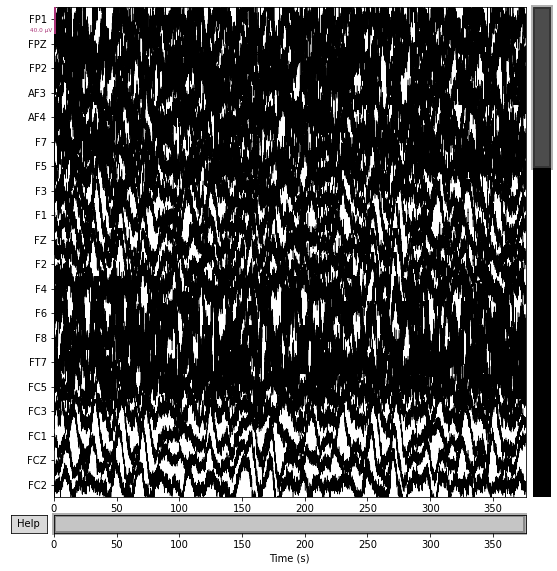

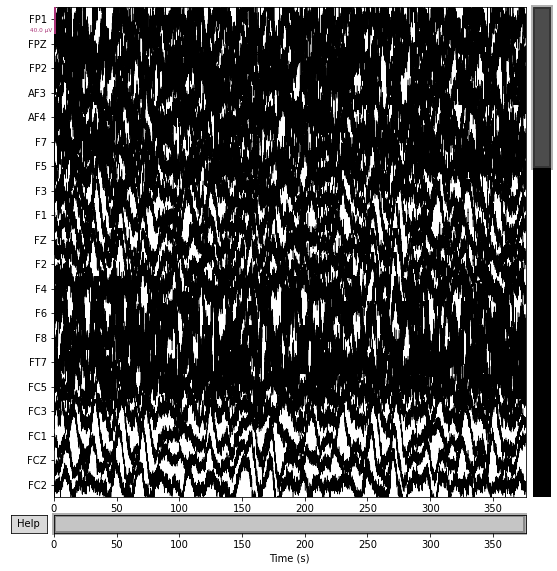

In [28]:
eeg_channels = mne.pick_types(raw.info, eeg=True)
raw.plot(duration=900, order=eeg_channels)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4125 samples (33.000 sec)



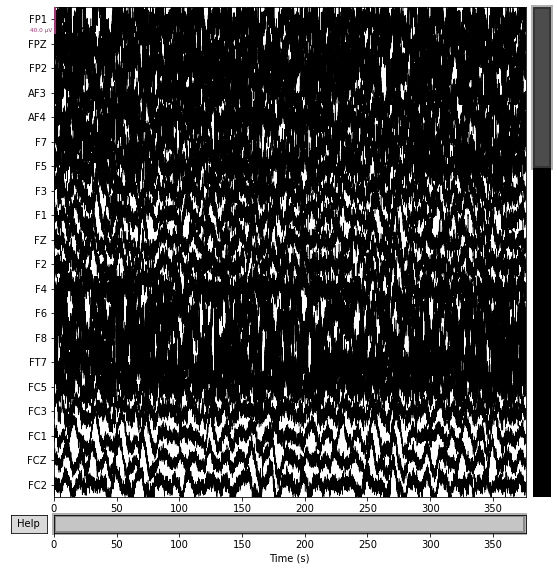

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 2063 samples (16.504 sec)



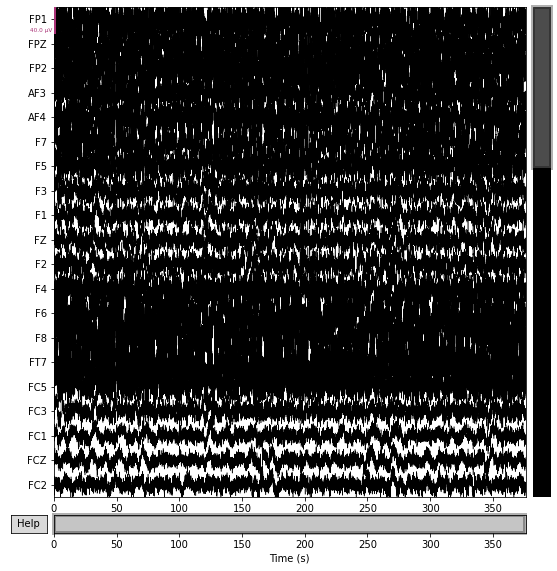

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)



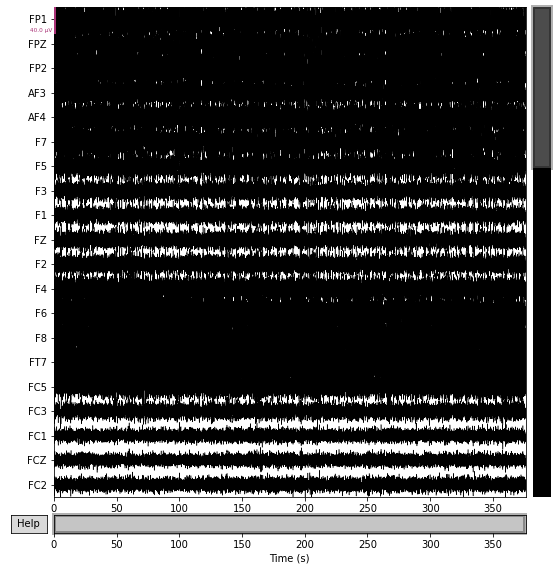

In [29]:
for cutoff in (0.1, 0.2, 1):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    fig = raw_highpass.plot(duration=900, order=eeg_channels)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 16.384 (s)


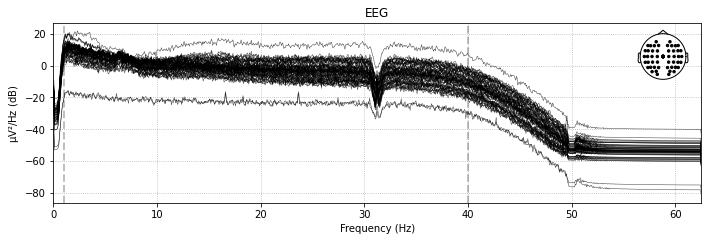

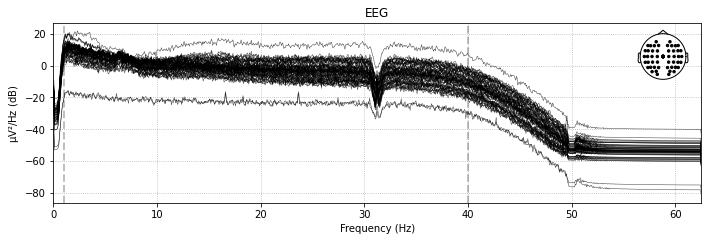

In [30]:
raw.filter(1, 40, method='iir')

raw.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)

Effective window size : 16.384 (s)


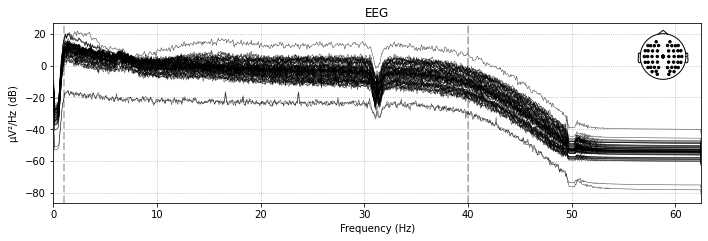

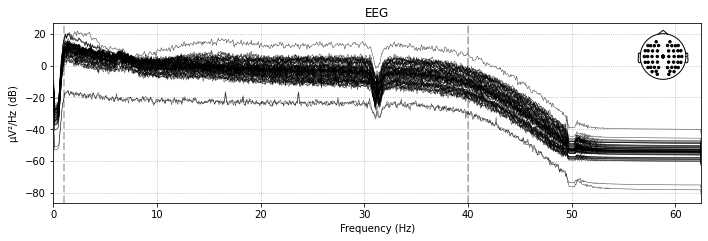

In [31]:
#filtering to remove slow drifts; also make copy of raw for later signal reconstruction
from mne.preprocessing import ICA

filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)
filt_raw.plot_psd()

In [32]:
# set up and fit the ICA
ica = ICA(n_components=16, random_state=32)
ica.fit(filt_raw)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 1.1s.


Method,fastica
Fit,49 iterations on raw data (47001 samples)
ICA components,16
Explained variance,94.5 %
Available PCA components,61
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=16, n_times=47001
    Range : 0 ... 47000 =      0.000 ...   376.000 secs
Ready.


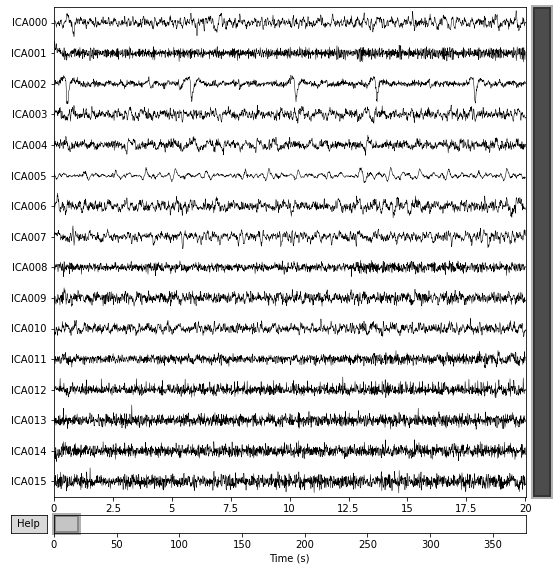

ValueError: The following electrodes have overlapping positions, which causes problems during visualization:
FP1, FPZ, FP2, FZ, FCZ, CZ, CPZ, PZ, PO5, POZ, PO6, CB1, OZ

In [33]:
ica.plot_sources(filt_raw)
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows


ValueError: The following electrodes have overlapping positions, which causes problems during visualization:
FP1, FPZ, FP2, FZ, FCZ, CZ, CPZ, PZ, PO5, POZ, PO6, CB1, OZ

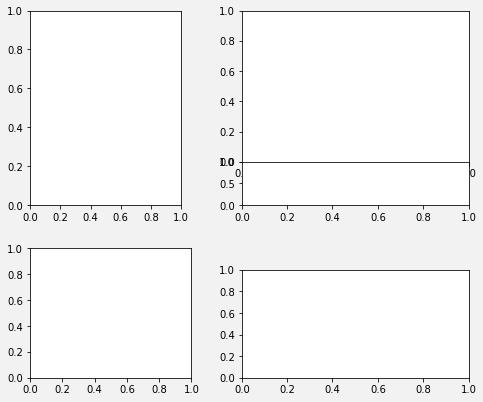

In [34]:
ica.plot_properties(filt_raw, picks=[0, 1])

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components


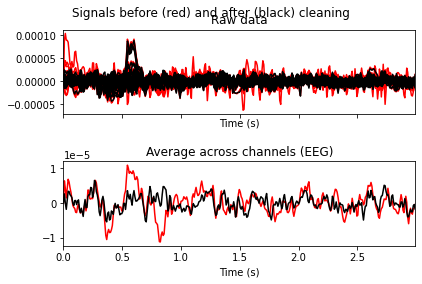

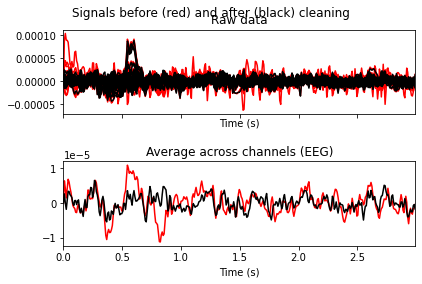

In [35]:
ica.plot_overlay(filt_raw, exclude=[0, 1], picks='eeg')

In [36]:
ica.exclude = [0, 1] #we want to cut down the 0, 1 component, then apply(self) to reconstruct the signal

In [37]:
# ica.apply() changes the Raw object in-place, so let's make a copy first for comparison:
orig_raw = raw.copy()  #we apply ica to raw
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components


<RawArray | 62 x 47001 (376.0 s), ~22.3 MB, data loaded>

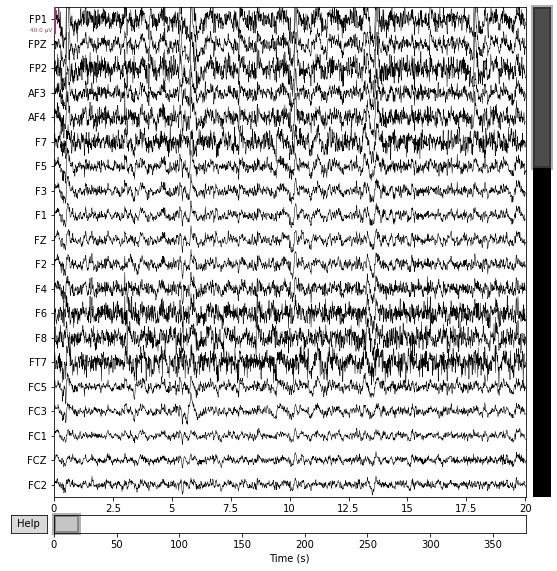

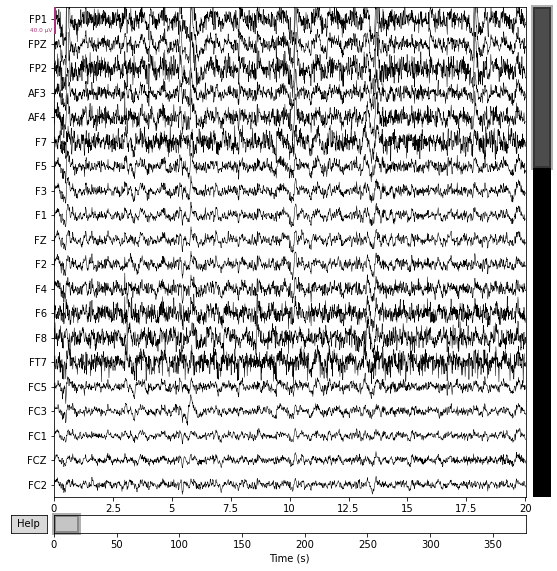

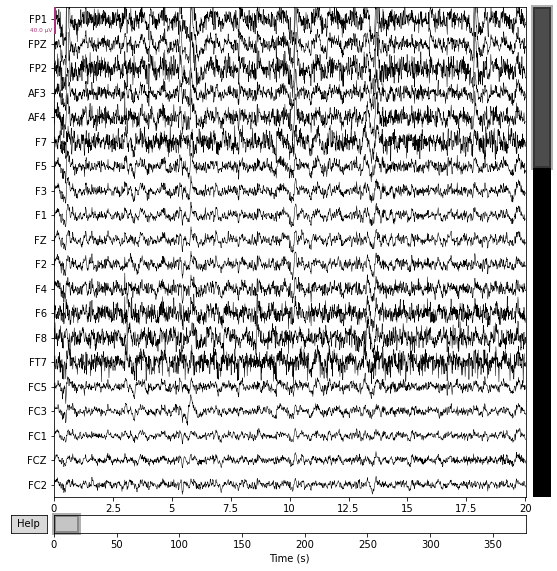

In [38]:
orig_raw.plot(order=eeg_channels, duration=20)
raw.plot(order=eeg_channels, duration=20)

In [53]:
from mne import Epochs, find_events

def getEpochs(raw, event_id, tmin, tmax, picks):

    #epoching
    events = find_events(raw, shortest_event = 1)
    
    #reject_criteria = dict(mag=4000e-15,     # 4000 fT
    #                       grad=4000e-13,    # 4000 fT/cm
    #                       eeg=100e-6,       # 150 μV
    #                       eog=250e-6)       # 250 μV

    reject_criteria = dict(eeg=100e-6)  #most frequency in this range is not brain components

    epochs = Epochs(raw, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, baseline=None, preload=True,verbose=False, picks=picks)  #8 channels
    print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

    return epochs

In [54]:
#this one requires expertise to specify the right tmin, tmax
event_id = {'0': 1, '1' : 2, '2': 3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10, '10':11, '11':12, '12':13, '14': 15}
tmin = -5
tmax = 0.5 
picks= eeg_channels
epochs = getEpochs(raw, event_id, tmin, tmax, picks)
#print(epochs.get_data())

Trigger channel has a non-zero initial value of 9 (consider using initial_event=True to detect this event)
22122 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 87 93]


C:\Users\damia\AppData\Local\Temp/ipykernel_19972/1805600743.py:6: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = find_events(raw, shortest_event = 1)


sample drop %:  66.59434047554471


In [55]:
X = epochs.get_data()
y = epochs.events[:, -1]


print(X.shape)
print(y.shape)

(7390, 61, 688)
(7390,)


In [57]:
class LSTM(nn.Module):
    '''
    Expected Input Shape: (batch, seq_len, channels)
    '''
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes, bidirectional, dropout):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, bidirectional=bidirectional, 
                            dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * num_layers, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # Set initial hidden and cell states
        #*2 because it's bidirectional
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device).float()
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device).float()
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0)) # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :]) 
        out = self.softmax(out)

        return out

In [117]:
input_dim = 61
hidden_dim = 32
num_layers = 2
num_classes = 16
bidirectional = True
dropout = 0.5

#LSTM
model_lstm = LSTM(input_dim, hidden_dim, num_layers, num_classes, bidirectional, dropout)
model_lstm = model_lstm.float() #define precision as float to reduce running time

# #CONV1D + LSTM
# model_conv1d_lstm = Conv1D_LSTM(input_dim, hidden_dim, num_layers, num_classes, bidirectional, dropout)
# model_conv1d_lstm = model_conv1d_lstm.float() #define precision as float to reduce running time

models = [model_lstm]

In [118]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

for model in models:
    print(f'The model {type(model).__name__} has {count_parameters(model):,} trainable parameters')# Train the model

The model LSTM has 50,448 trainable parameters


In [119]:
import torch.optim as optim

learning_rate = 0.01

optimizer = optim.Adam(model.parameters())
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [120]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Configured device: ", device)

Configured device:  cpu


In [121]:
for model in models:
    model = model.to(device)
criterion = criterion.to(device)

In [122]:
torch_X = torch.from_numpy(X)
torch_y = torch.from_numpy(y)

In [123]:
print("Original X: ", torch_X.size())

Original X:  torch.Size([7390, 61, 688])


In [124]:
torch_X_reshaped = torch_X.permute(0, 2, 1)
print("Converted X: ", torch_X_reshaped.size())

Converted X:  torch.Size([7390, 688, 61])


In [125]:
torch_X_reshaped = torch_X.permute(0, 2, 1)
print("Converted X: ", torch_X_reshaped.size())

Converted X:  torch.Size([7390, 688, 61])


In [126]:
from torch.utils.data import TensorDataset

# Define dataset
ds = TensorDataset(torch_X_reshaped, torch_y)

#Train test split
train_size = int(torch_X_reshaped.size()[0] * 0.7)
valid_size = int(torch_X_reshaped.size()[0] * 0.2)
test_size = int(torch_X_reshaped.size()[0] * 0.1)

train_set, valid_set, test_set = torch.utils.data.random_split(ds, [train_size, valid_size, test_size])

BATCH_SIZE = 64 #keeping it binary so it fits GPU
#Train set loader
train_iterator = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)
#Validation set loader
valid_iterator = torch.utils.data.DataLoader(dataset=valid_set, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)

#Test set loader
test_iterator = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True)

In [127]:
def train(model, iterator, optimizer, criterion):
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch, labels in iterator:
        
        #Move tensors to the configured device
        batch = batch.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(batch.float())
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        #check accuracy
        predictions = model(batch.float())
        _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
        total += labels.size(0)  #keep track of total
        correct += (predicted == labels).sum().item()  #.item() give the raw number
        acc = 100 * (correct / total)
                
        epoch_loss += loss.item()
        epoch_acc = acc
        
    return epoch_loss / len(iterator), epoch_acc

In [128]:
def evaluate(model, iterator, criterion):
    
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch, labels in iterator:
            
            #Move tensors to the configured device
            batch = batch.to(device)
            labels = labels.to(device)

            predictions = model(batch.float())
            loss = criterion(predictions, labels)

            _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
            total += labels.size(0)  #keep track of total
            correct += (predicted == labels).sum().item()  #.item() give the raw number
            acc = 100 * (correct / total)
            
            epoch_loss += loss.item()
            epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [129]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')

for i, model in enumerate(models):
    print(f"Training {type(model).__name__}")
    
    start_time = time.time()

    for epoch in range(N_EPOCHS):
        start_time = time.time()

        train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
        valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

        end_time = time.time()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
        if (epoch+1) % 5 == 0:
            print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
            print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
            print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc:.2f}%')

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            print("Model:{} saved.".format(type(model).__name__))
            torch.save(model.state_dict(), 'checkpoint.pth.tar')
            best_model_index = i

Training LSTM
Model:LSTM saved.
Model:LSTM saved.
Model:LSTM saved.
Epoch: 05 | Epoch Time: 2m 29s
	Train Loss: 2.593 | Train Acc: 8.27%
	 Val. Loss: 2.586 |  Val. Acc: 8.74%
Model:LSTM saved.
Model:LSTM saved.
Epoch: 10 | Epoch Time: 2m 32s
	Train Loss: 2.589 | Train Acc: 8.33%
	 Val. Loss: 2.591 |  Val. Acc: 8.25%


In [ ]:
# models[best_model_index].load_state_dict(torch.load('models/checkpoint.pth.tar'))

# test_loss, test_acc = evaluate(models[best_model_index], test_iterator, criterion)
# print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.2f}%')